<a href="https://colab.research.google.com/github/Nursatt/success_project_yolov8/blob/main/2605_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
MY_SECRET_KEY="ztxhFxdsZHZcp6IxFVEy"

In [1]:
 !pip install ultralytics
 !pip install roboflow

In [3]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image

In [7]:
rf = Roboflow(MY_SECRET_KEY)
project = rf.workspace("detecting-stuff").project("detect-fire-om6o8")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to detect-fire-1 in yolov8:: 100%|██████████| 292/292 [00:00<00:00, 5711.38it/s]


In [8]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/detect-fire-1/data.yaml epochs=25 imgsz=640 plots=True

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/detect-fire-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

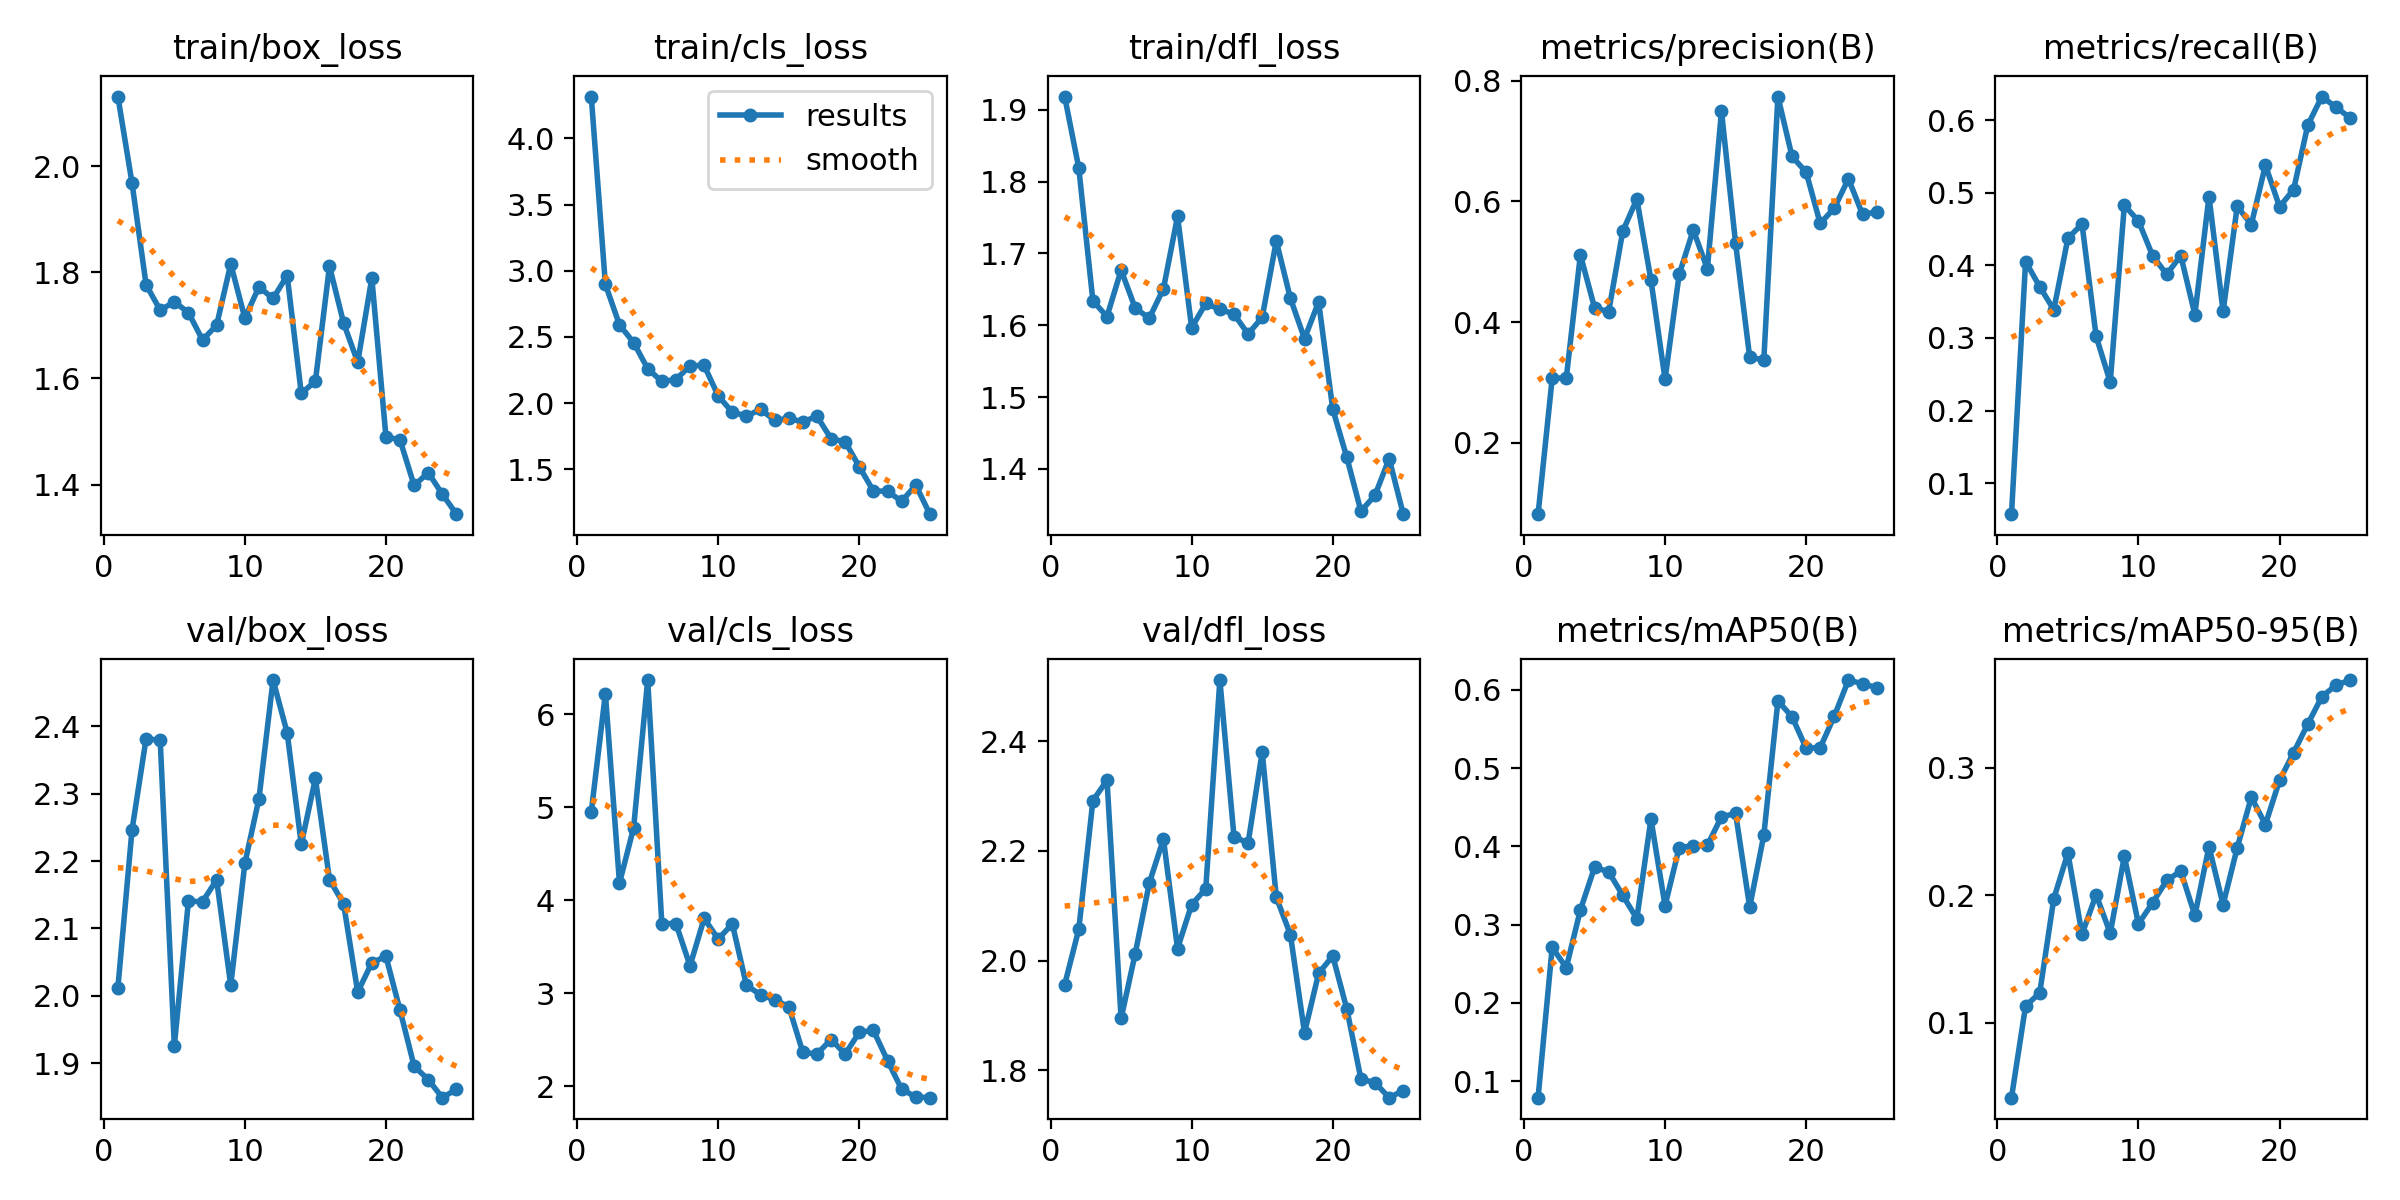

In [9]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/fire-1/data.yaml

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 583, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 528, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py", line 143, in __call__
    self.data = check_det_dataset(self.args.data)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/utils.py", line 269, in check_det_dataset
    file = check_file(datase